In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def process_sandp_tsx_data():
    # Get the current path
    current_path = os.getcwd()
    
    csv_file_path = current_path + "/data/sandp_tsx.csv"
    
    # Load the csv file.
    df_original = pd.read_csv(csv_file_path)
    
    # We only use data for Date, Open, and Close.
    df_less_columns = df_original.drop(columns=["Adj Close", "Volume"])
    
    # Delete rows whose Open or Close values have NaN
    df = df_less_columns.dropna()
    
    # Grab some data from the last portions of df.
    number_of_rows = 200
    df = df.tail(number_of_rows)
    
    return df

In [4]:
def add_bollinger_bands(df):
    # Add Bollinger Bands
    # The middle band is 20 days
    band = 20

    # Standard deviation
    dev = 2
    
    # Calculate mean
    df["MA"] = df["Close"].rolling(band).mean()
    
    # Calculate standard deviation
    df["STD"] = df["Close"].rolling(band).std()
    
    # Calculate upper bands
    df["OVB"] = df["MA"] + df["STD"] * dev
    
    # Calculate lower bands
    df["OVS"] = df["MA"] - df["STD"] * dev
    
    return df

In [5]:
def plot_candle_sticks(df, up, down):
    # This is for increasing stock values
    col_up = 'green'

    # This is for decreasing stock values
    col_down = 'red'

    # Assign values for widths
    width_bar = 0.8
    width_vertical_line = 0.03

    # Chage the plot size
    plot_width = 30
    plot_height = 14
    plt.figure().set_size_inches(plot_width, plot_height, forward=True)

    # Plotting up prices of the stock
    plt.bar(up.index, up.Close-up.Open, width_bar, bottom=up.Open, color=col_up)
    plt.bar(up.index, up.High-up.Close, width_vertical_line, bottom=up.Close, color=col_up)
    plt.bar(up.index, up.Low-up.Open, width_vertical_line, bottom=up.Open, color=col_up)

    # Plotting down prices of the stock
    plt.bar(down.index, down.Close-down.Open, width_bar, bottom=down.Open, color=col_down)
    plt.bar(down.index, down.High-down.Open, width_vertical_line, bottom=down.Open, color=col_down)
    plt.bar(down.index, down.Low-down.Close, width_vertical_line, bottom=down.Close, color=col_down)

In [6]:
def plot_bollinger(df, up, down):
    plt.plot(df["OVB"], color="b", label="Upper Band")
    plt.plot(df["OVS"], color="b", label="Lower Band")
    plt.plot(df["MA"], color="0.5", label="Mid Band")
    
    # Fill the area between two lines
    plt.fill_between(df.index, df["OVB"], df["OVS"], color='b', alpha=0.03)

In [7]:
def plot_stock_chart(df, up, down):
    plot_candle_sticks(df, up, down)
    plot_bollinger(df, up, down)

    # rotating the x-axis tick labels at 30 degree
    # towards right
    plt.xticks(rotation=30, ha='right')
    plt.xticks(df.index, df.Date)

    title_fontsize = 30
    fontsize = 20

    # Set the title
    plt.title("S&P/TSX composite with Bollinger Bands for last 200 days", fontsize=title_fontsize) 

    # Setting the x and y labels
    plt.xlabel("Date", fontsize=fontsize) 
    plt.ylabel("Price (CAD)", fontsize=fontsize) 

    # Setting the number of ticks 
    number_of_bins = int(200/5)
    plt.locator_params(axis='x', nbins=number_of_bins)

    # Add legend
    plt.legend(loc="lower right")

    # displaying candlestick chart of stock data
    # of a week
    plt.show()

In [8]:
def main():
    # Data without Bollinger Bands
    df_no_bollinger = process_sandp_tsx_data()
    
    # This data contain Bollinger Bands
    df = add_bollinger_bands(df_no_bollinger)
    
    # Closing price is higher than Opening price
    up = df[df.Close >= df.Open]

    # Closing price is lower than Opening price
    down = df[df.Close <= df.Open]
    
    plot_stock_chart(df, up, down)

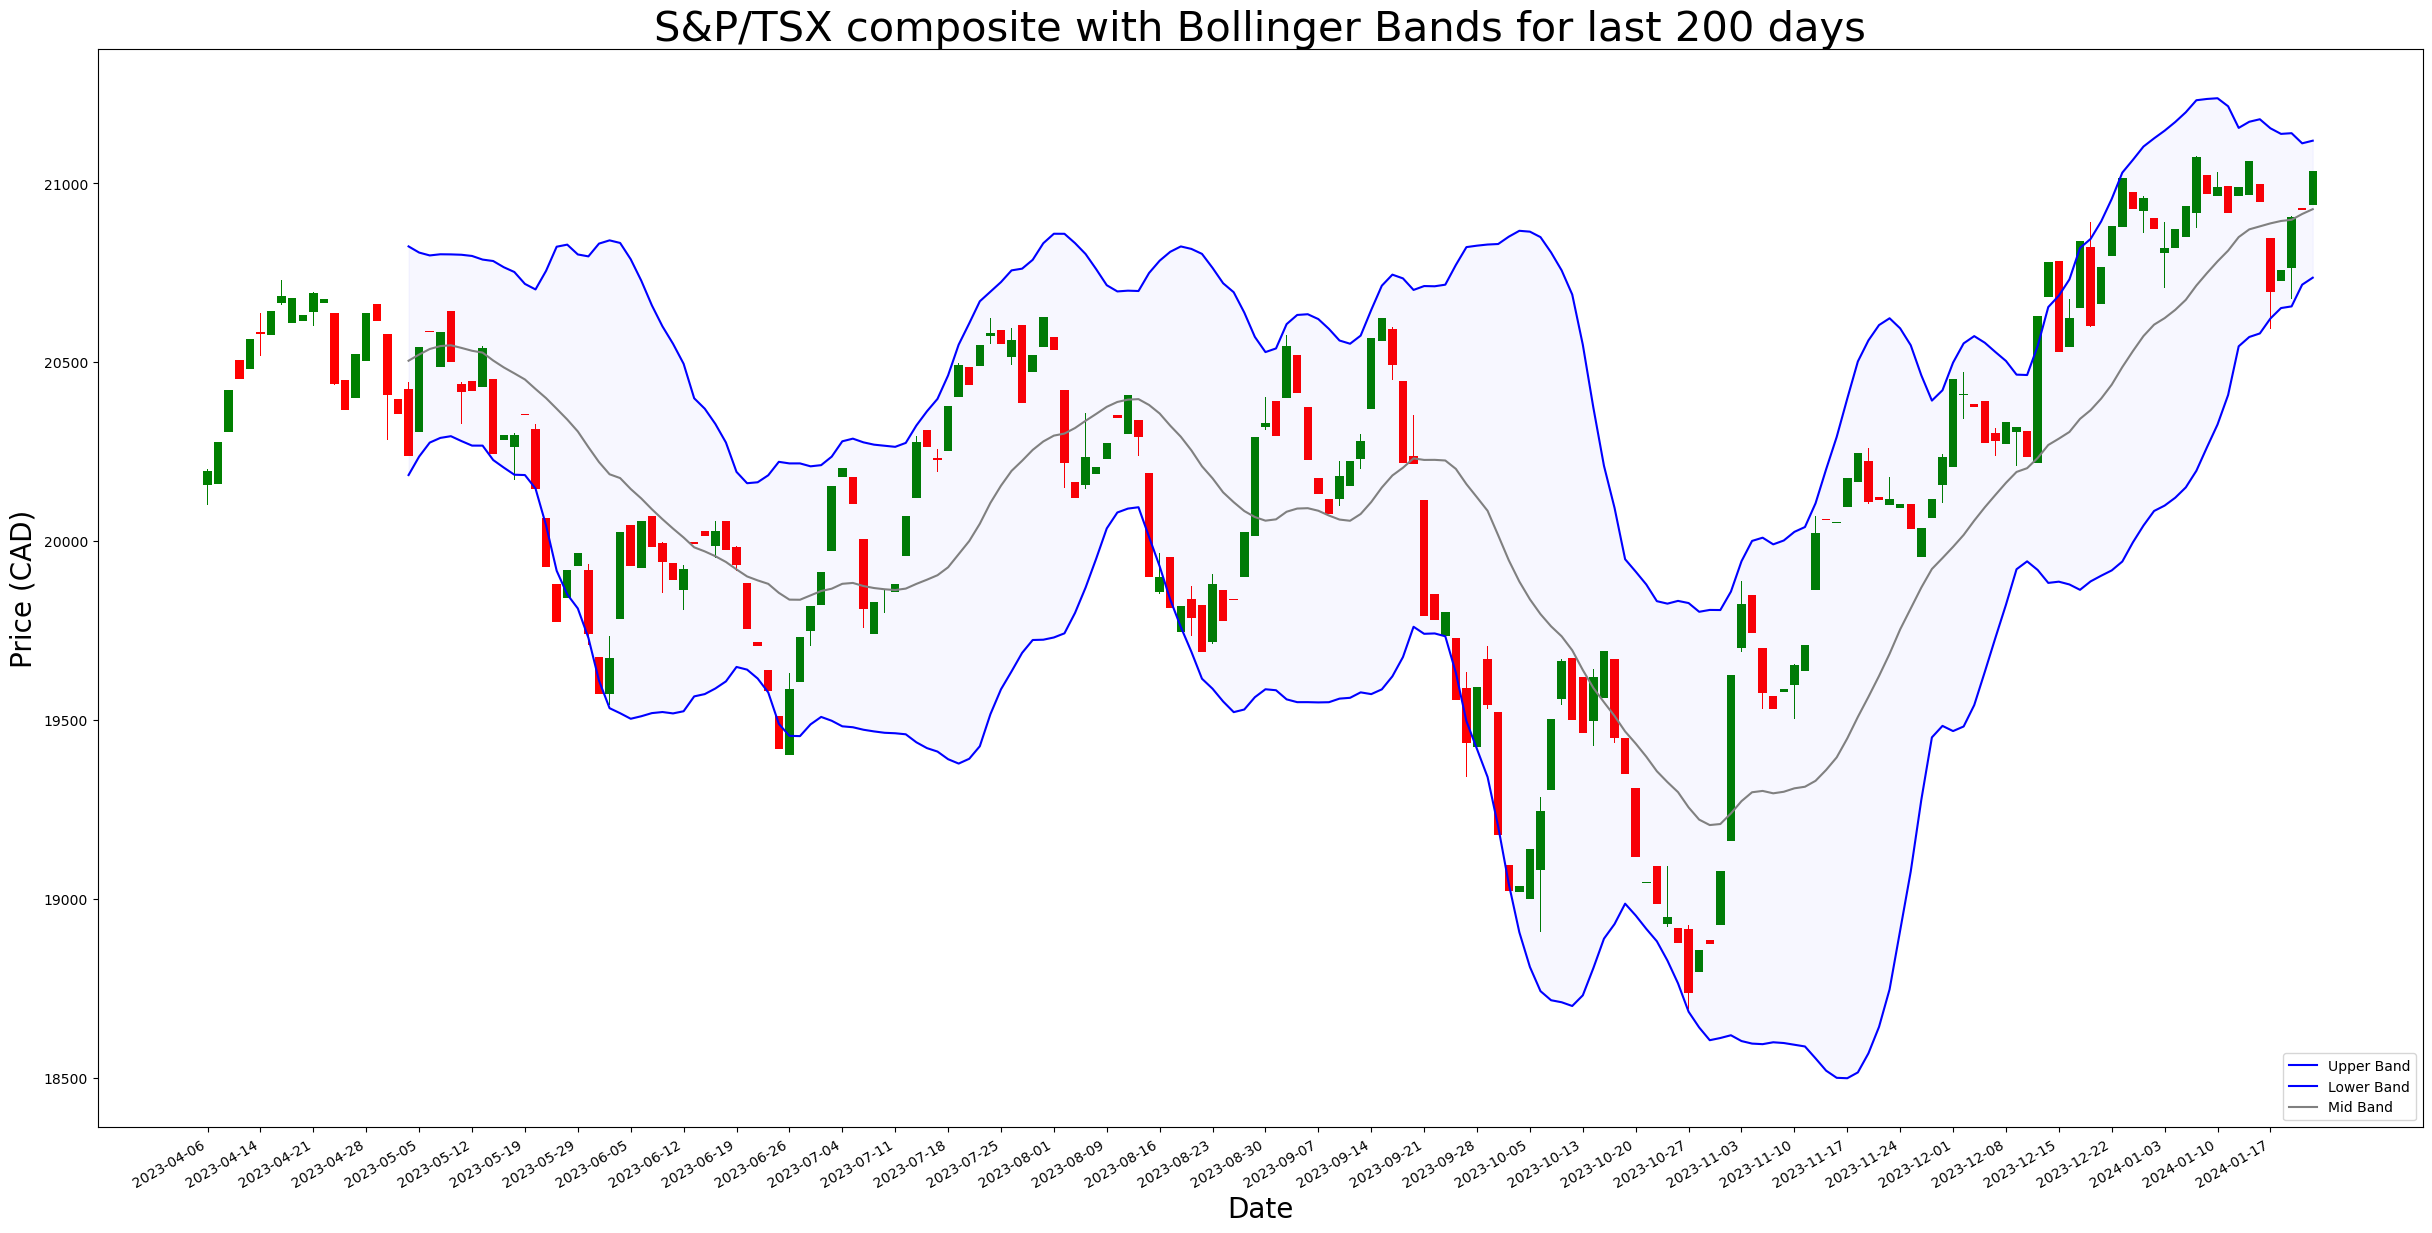

In [9]:
main()